# Head pose and Eye gaze

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('./DataLoader')

from DataLoader.Dataset import Dataset
import helpers
from helpers import imshow

from scipy.spatial.transform import Rotation as R

## Creation of a Dataset container

In [2]:
DATASET_PATH= './Data'
dp = Dataset(path=DATASET_PATH)[0]

## Head coordinates system

No handles with labels found to put in legend.


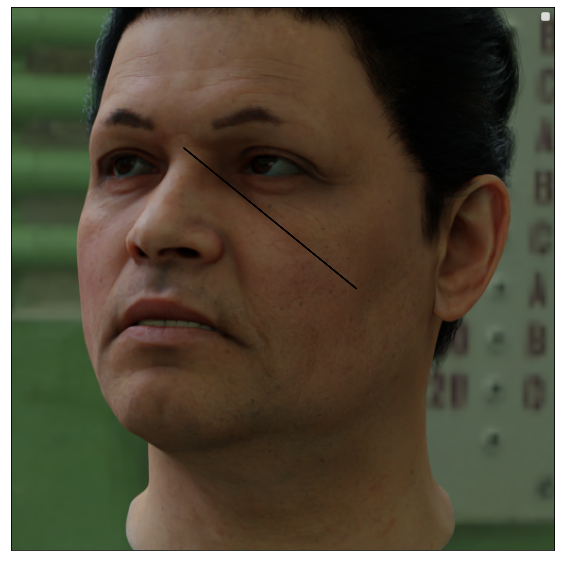

In [9]:
# FIXME Fix lookat vector
world_to_img = lambda x : helpers.world_to_img(x, dp.intrinsic_matrix, dp.extrinsic_matrix)
world_to_cam = lambda x : helpers.world_to_cam(x, dp.extrinsic_matrix)

head_root = world_to_img(dp.head_metadata.head_root_location)
head_center = world_to_img(dp.head_metadata.head_six_dof.location)

rot_vecs = dp.head_metadata.head_rotation
rot_mat = R.from_euler('zyx', [rot_vecs[2], rot_vecs[1], rot_vecs[0]], degrees=True).as_matrix()
x_axis, y_axis, z_axis = np.hsplit(rot_mat, 3)
x_axis, y_axis, z_axis = world_to_cam(np.squeeze(x_axis)), world_to_cam(np.squeeze(y_axis)), world_to_cam(np.squeeze(z_axis))


# look_at_vector = world_to_img(dp.head_metadata.head_six_dof.look_at_vector, dp.intrinsic_matrix, dp.extrinsic_matrix)
imshow(dp.rgb_img)
plt.arrow(*head_center, *(head_center + 0.05*x_axis[:2]))
plt.arrow(*head_center, *(head_center + 0.05*y_axis[:2]))
plt.arrow(*head_center, *(head_center + 0.05*z_axis[:2]))
# plt.arrow(*head_center, *(head_center + 0.05*look_at_vector))
plt.legend()